# 2. Visualization
## 2.2. Place of work

Where do the authors work? The more recent the publication the more likely the affiliation on the publication is the current place of work. More up-to-date information could be found on their ORCID profile.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import fiona
import geopandas as gpd
import pickle
from itertools import groupby

PROJ: proj_create_from_database: Cannot find proj.db


## Functions

In [2]:
def freq_country_codes(df):
    # get list of countries with authors
    countries = list(df["inst_country_code"])
    # remove None values + alphabetical
    countries = sorted([i for i in countries if i is not None])
    
    # count how many of each group (country)
    freqs = [len(list(group)) for key, group in groupby(countries)]
    
    # link counts to country codes
    freqs_dict = {}
    for i, country in enumerate(sorted(set(countries))):
        freqs_dict[country] = freqs[i]

    return freqs_dict

In [3]:
# get worldmap 
def plot_country_freqs(freqs, map_path, europe=False, dpi='figure'):
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    worldmap = worldmap.to_crs("ESRI:54009") 

    # convert 3-letter codes to 2-letter codes used for frequencies
    country_codes = pd.read_csv("countries_codes_and_coordinates.csv")
    country_codes = country_codes.applymap(lambda x: x.replace(' "', ""))
    country_codes = country_codes.applymap(lambda x: x.replace('"', ""))
    
    worldmap = worldmap.rename(columns={"iso_a3":"Alpha-3 code"})
    worldmap = pd.merge(worldmap, country_codes[["Alpha-2 code", "Alpha-3 code"]], 
                        on="Alpha-3 code", how="left")
    # fix problem with France
    worldmap.at[43,"Alpha-2 code"] = "FR"

    # add frequencies to worldmap
    worldmap["freq"] = worldmap["Alpha-2 code"].map(freqs)
    worldmap["freq"].fillna(0, inplace=True)
            
    # plot frequencies
    if not europe:
        fig, ax = plt.subplots(1,1)
        worldmap.plot(column='freq', ax=ax, legend=True)
        plt.savefig(map_path+".png", dpi=dpi)
    
    if europe:
        fig, ax = plt.subplots(1, 1)
        # limit scope of map to europe
        minx, miny, maxx, maxy = [-1500000, 4000000, 3500000, 8500000]
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        # limit data to europe
        europemap = worldmap.loc[worldmap["continent"] == "Europe"]
        europemap.plot(column='freq', ax=ax, legend=True)
        plt.savefig(map_path+"_europe.png", dpi=dpi)

## Results

In [4]:
articles = pd.read_pickle("./data/keyword_filtered_articles_global_with_taxonomy_concept_in_journal.pkl")

single_authors = pd.read_pickle("./data/global_authors_taxonomic_articles_no_duplicates.pkl")
single_authors

,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,inst_country_code,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,https://openalex.org/W4297231556,first,https://openalex.org/A2013800410,Fernando Esteve-Raventós,https://orcid.org/0000-0001-8265-5067,Department of Life Sciences (Botany Unit). Uni...,https://openalex.org/I189268942,University of Alcalá,https://ror.org/04pmn0e78,ES,...,unknown,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
1,https://openalex.org/W4297498941,middle,https://openalex.org/A4297507406,Andrew J. Wheeler,None,"School of Biological, Earth & Environmental Sc...",https://openalex.org/I27577105,University College Cork,https://ror.org/03265fv13,IE,...,unknown,https://openalex.org/P4310320990,Elsevier BV,[https://openalex.org/P4310320990],[Elsevier BV],journal,True,green,https://discovery.ucl.ac.uk/10161272/1/1-s2.0-...,True
2,https://openalex.org/W2048270773,last,https://openalex.org/A4347652950,Marina P. Poltavskaya,None,,None,None,None,None,...,unknown,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
3,https://openalex.org/W2981790731,middle,https://openalex.org/A4335911509,Peter G. Avis,None,"Indiana University Northwest, Gary, USA",https://openalex.org/I4210093298,Indiana University Northwest,https://ror.org/00n9fkm63,US,...,unknown,https://openalex.org/P4310319900,Springer Science+Business Media,"[https://openalex.org/P4310319965, https://ope...","[Springer Nature, Springer Science+Business Me...",journal,False,closed,None,False
4,https://openalex.org/W2902614410,middle,https://openalex.org/A4358685442,Fabiano Rodrigues de Melo,None,"Universidade Federal de Goiás, Regional Jataí,...",https://openalex.org/I4210090392,Universidade Federal de Jataí,https://ror.org/00cs91c30,BR,...,unknown,https://openalex.org/P4310320990,Elsevier BV,[https://openalex.org/P4310320990],[Elsevier BV],journal,True,hybrid,https://doi.org/10.1016/j.ympev.2018.11.012,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70081,https://openalex.org/W4309671698,middle,https://openalex.org/A4309672000,Yu-Ni Huang,https://orcid.org/0000-0001-5421-4192,,None,None,None,None,...,unknown,https://openalex.org/P4310321056,Pensoft Publishers,[https://openalex.org/P4310321056],[Pensoft Publishers],journal,True,gold,https://doi.org/10.3897/phytokeys.214.90004,True
70082,https://openalex.org/W2346646896,last,https://openalex.org/A4357379351,David R. Smyth,None,Environment Studies Center (ESC) at Qatar Univ...,None,Environment Studies Center (ESC) at Qatar Univ...,None,None,...,unknown,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,True,bronze,https://doi.org/10.11646/zootaxa.4107.3.4,False
70083,https://openalex.org/W2920015355,middle,https://openalex.org/A1262975498,Corina Anabel Coviaga,https://orcid.org/0000-0002-2634-2354,Delegación departamental de Geología y petróle...,https://openalex.org/I70368782,National University of Comahue,https://ror.org/02zvkba47,AR,...,unknown,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False
70084,https://openalex.org/W2592298360,middle,https://openalex.org/A4355697923,Mohamed Salama,None,,None,None,None,None,...,unknown,https://openalex.org/P4310321855,Q15088586,[https://openalex.org/P4310321855],[Q15088586],journal,False,closed,None,False


In [5]:
countries_freq = freq_country_codes(single_authors)
countries_freq

{'AE': 5,
 'AG': 1,
 'AL': 10,
 'AM': 19,
 'AO': 7,
 'AR': 1038,
 'AT': 283,
 'AU': 1528,
 'AZ': 17,
 'BA': 7,
 'BB': 2,
 'BD': 25,
 'BE': 395,
 'BF': 8,
 'BG': 80,
 'BJ': 27,
 'BM': 2,
 'BN': 15,
 'BO': 40,
 'BR': 5920,
 'BS': 5,
 'BT': 16,
 'BW': 5,
 'BY': 14,
 'BZ': 1,
 'CA': 632,
 'CD': 12,
 'CG': 7,
 'CH': 294,
 'CI': 14,
 'CL': 281,
 'CM': 77,
 'CN': 7100,
 'CO': 676,
 'CR': 125,
 'CU': 63,
 'CV': 5,
 'CW': 1,
 'CY': 17,
 'CZ': 721,
 'DE': 1539,
 'DK': 167,
 'DO': 6,
 'DZ': 61,
 'EC': 140,
 'EE': 61,
 'EG': 103,
 'ER': 4,
 'ES': 1263,
 'ET': 24,
 'FI': 138,
 'FJ': 5,
 'FK': 1,
 'FO': 1,
 'FR': 870,
 'GA': 12,
 'GB': 1246,
 'GE': 25,
 'GF': 15,
 'GH': 7,
 'GI': 1,
 'GL': 4,
 'GN': 7,
 'GP': 5,
 'GQ': 2,
 'GR': 157,
 'GT': 30,
 'GY': 1,
 'HN': 7,
 'HR': 106,
 'HU': 220,
 'ID': 170,
 'IE': 62,
 'IL': 98,
 'IN': 1945,
 'IQ': 25,
 'IR': 889,
 'IS': 13,
 'IT': 914,
 'JE': 2,
 'JM': 7,
 'JO': 1,
 'JP': 1274,
 'KE': 52,
 'KG': 4,
 'KH': 20,
 'KR': 527,
 'KW': 7,
 'KY': 2,
 'KZ': 23,
 'LA

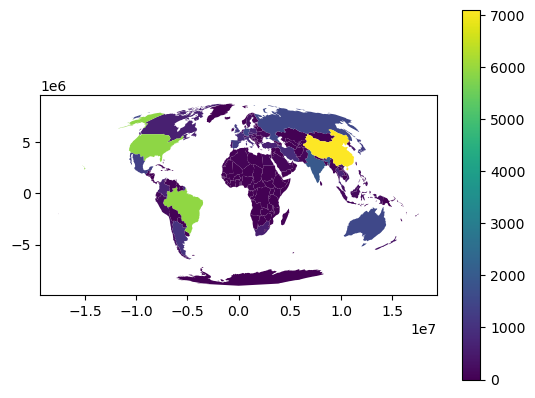

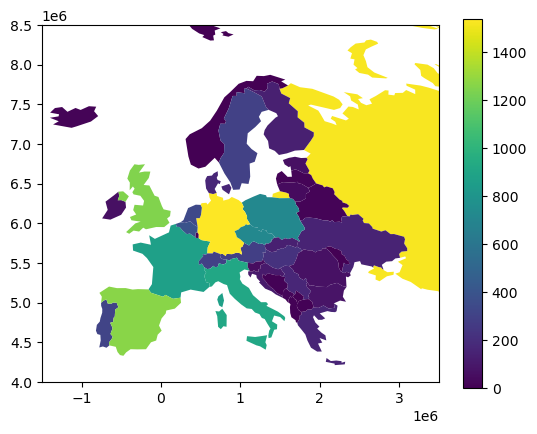

In [6]:
plot_country_freqs(countries_freq, "./figures/map_all_journals")
plot_country_freqs(countries_freq, "./figures/map_all_journals", europe=True)

In [8]:
eujot_freq = freq_country_codes(single_authors[single_authors["source_display_name"]=="European journal of taxonomy"])

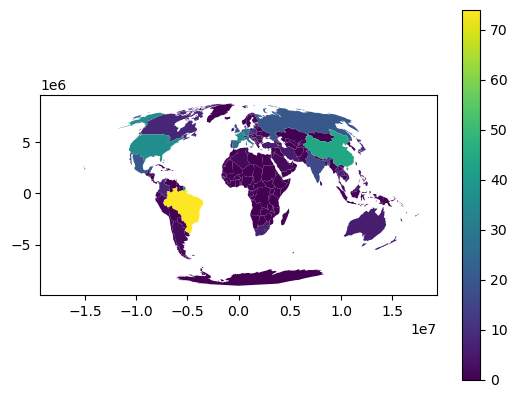

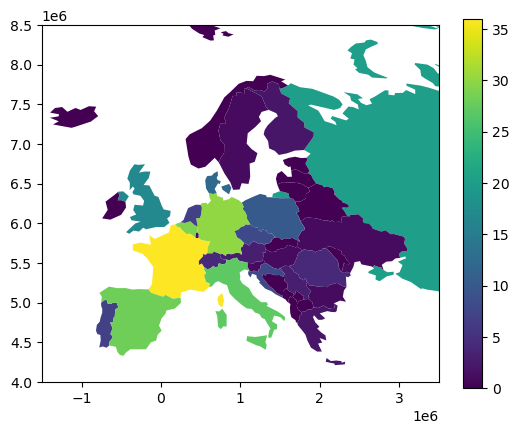

In [9]:
plot_country_freqs(eujot_freq, "./figures/map_eujot")
plot_country_freqs(eujot_freq, "./figures/map_eujot", europe=True)